The `%matplotlib` magic command is used here to enable plotting in the current notebook. The `inline` backend will embed plots inside the notebook.

In [1]:
%matplotlib inline

#### Import necessary modules

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#### We can directly read the netcdf file from the THREDDS server using the xarray package: 

In [3]:
ds = xr.open_dataset('../Data/butler_c8ee_04d0_8183.nc')

#### You can list variables in the netcdf file:

In [4]:
print ds

<xarray.Dataset>
Dimensions:                  (row: 52076)
Coordinates:
    station_name             (row) |S6 'butler' 'butler' 'butler' 'butler' ...
Dimensions without coordinates: row
Data variables:
    time                     (row) datetime64[ns] 2011-03-01T18:00:00 ...
    AirTC_2_Avg              (row) float64 6.695 7.641 8.59 9.23 8.88 7.533 ...
    AirTC_Avg                (row) float64 6.504 7.484 8.48 8.91 8.77 7.254 ...
    Albedo_1_Avg             (row) float64 0.166 0.165 0.168 0.183 0.248 ...
    Albedo_Avg               (row) float64 0.342 0.35 0.358 0.361 0.368 ...
    CmCIR_Avg                (row) float64 11.21 13.01 13.07 11.36 7.267 ...
    CmGIR_Avg                (row) float64 18.23 18.54 17.39 14.25 9.34 ...
    DnTot_Avg                (row) float64 287.0 271.3 228.4 159.0 76.84 ...
    IR01DnCo_Avg             (row) float64 385.4 392.4 391.1 383.2 364.2 ...
    IR01Dn_Avg               (row) float64 25.71 26.11 20.53 11.16 -0.71 ...
    IR01UpCo_Avg          

#### Tip 1

To make our lives easier, we can create a dictionary that contains the variable names as they are in the table above as well as the actual names that humans use. We will call this dictionary: names. Once we have created this dictionary, we can look up the data variables in it and get the human name.

For example:

In [5]:
names = {'AirTC_Avg': 'Air Temperature (conventional roof)',
         'AirTC_2_Avg': 'Air Temperature (green roof)',
         'RH': 'Relative Humidity (conventional Roof)',
         'RH_2': 'Relative Humidity (green roof)',
         'CmCIR_Avg': 'Infrared Skin Temperature (conventional roof)',
         'CmGIR_Avg': 'Infrared Skin Temperature (green roof)'}
print names['CmGIR_Avg']

Infrared Skin Temperature (green roof)


#### Tip 2

To plot several variables over a defined period of time, we can use a list of variables, and a slice of time to generate a `pandas.DataFrame`. Converting to a `pandas.DataFrame` gives us lots of options for analysis, but it also means that we are going to load the data into local memory, so be careful how much data you try to load. This can get slow if you try to load all the variables for years of data being collected every minute. 

For example:

In [6]:
Temp_and_RH_ds = ds[['time', 'AirTC_Avg', 'AirTC_2_Avg', 'RH','RH_2', 'CmCIR_Avg', 'CmGIR_Avg']]
newdf = Temp_and_RH_ds.to_dataframe().drop(['station_name'], axis=1)
newdf = newdf.set_index('time')
newdf.describe(percentiles=[.1, .25, .5, .75, .9])

AirTC_Avg   AirTC_2_Avg            RH          RH_2     CmCIR_Avg  \
count  52076.000000  52076.000000  52076.000000  52076.000000  52076.000000   
mean      13.121328     13.220836     67.294327     64.349364     13.058930   
std       10.286360     10.275650     25.324400     20.922912     14.518814   
min      -17.900000    -17.930000     10.600000     10.700000    -25.260000   
10%       -0.402500     -0.316000     36.730000     35.430000     -4.498000   
25%        4.969750      5.106000     48.940000     47.720000      2.165750   
50%       13.540000     13.660000     65.580000     64.340000     12.150000   
75%       21.280000     21.360000     83.600000     82.700000     21.410000   
90%       26.490000     26.550000     95.100000     93.000000     33.390000   
max       40.770000     39.410000    160.700000    100.000000     59.620000   

          CmGIR_Avg  
count  52076.000000  
mean      13.292702  
std       11.888483  
min      -22.150000  
10%       -2.022000  
25%        4.124000  
50%       13.380000  
75%       21.430000  
90%       28.960000  
max       50.180000

#### You can plot the time series picking up 2 variables for the entire data record:

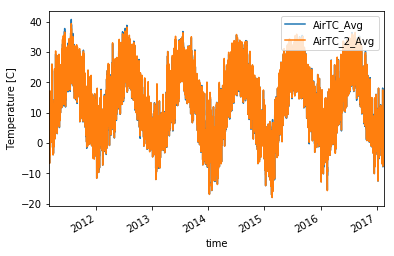

In [7]:
newdf.AirTC_Avg.plot()
newdf.AirTC_2_Avg.plot()
plt.ylabel('Temperature [C]')
plt.legend(loc='upper right');

#### If you just want to show one particular day:

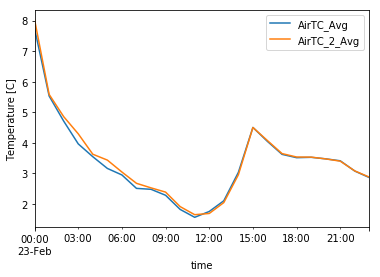

In [8]:
newdf['AirTC_Avg'].loc['2016-02-23'].plot()
newdf['AirTC_2_Avg'].loc['2016-02-23'].plot()
plt.title("")
plt.ylabel('Temperature [C]')
plt.legend(loc='upper right');

#### We often are more interested in looking at a particular time range. Here is one way to select a particular time range:

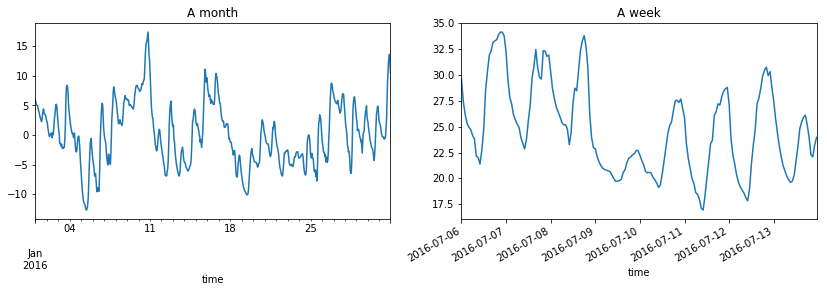

In [9]:
# Choose a date period (such as a month)
a_month = newdf['AirTC_Avg'].loc['2016-01']

# Or grab the range between two specific days
a_week =  newdf['AirTC_Avg'].loc[slice('2016-07-06', '2016-07-13')]

# Create a figure with two subplots 
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14,4))

# Plot the month of data in the first subplot
a_month.plot(ax=axes[0])
axes[0].set_title('A month')

# Plot the week of data in the second subplot
a_week.plot(ax=axes[1])
axes[1].set_title('A week')

plt.show()

#### You can also plot  2 variables with different y axies

In [10]:
newdf_short = newdf[['AirTC_Avg','CmCIR_Avg']]

In [11]:
newdf_short

AirTC_Avg  CmCIR_Avg
time                                     
2011-03-01 18:00:00      6.504     11.210
2011-03-01 19:00:00      7.484     13.010
2011-03-01 20:00:00      8.480     13.070
2011-03-01 21:00:00      8.910     11.360
2011-03-01 22:00:00      8.770      7.267
2011-03-01 23:00:00      7.254      1.791
2011-03-02 00:00:00      5.824     -2.593
2011-03-02 01:00:00      4.508     -5.336
2011-03-02 02:00:00      3.056     -7.291
2011-03-02 03:00:00      1.770     -8.650
2011-03-02 04:00:00      0.949     -9.630
2011-03-02 05:00:00      0.108    -10.200
2011-03-02 06:00:00     -0.309    -10.550
2011-03-02 07:00:00     -0.302     -9.300
2011-03-02 08:00:00     -0.532     -8.590
2011-03-02 09:00:00     -0.634     -8.510
2011-03-02 10:00:00     -0.705     -8.890
2011-03-02 11:00:00     -0.917     -9.010
2011-03-02 12:00:00     -0.234     -7.176
2011-03-02 13:00:00      0.918     -3.493
2011-03-02 14:00:00      2.910     -0.151
2011-03-02 15:00:00      5.082      4.686
2011-03-02 16:00:00      6.976      9.500
2011-03-02 17:00:00      9.410     13.640
2011-03-02 18:00:00     10.990     15.710
2011-03-02 19:00:00     12.100     16.110
2011-03-02 20:00:00     11.800     14.250
2011-03-02 21:00:00     11.150     10.770
2011-03-02 22:00:00     11.210      9.030
2011-03-02 23:00:00      9.170      4.758
...                        ...        ...
2017-02-17 03:00:00     -0.681     -6.250
2017-02-17 04:00:00     -1.088     -6.634
2017-02-17 05:00:00     -1.692     -7.498
2017-02-17 06:00:00     -2.254     -8.030
2017-02-17 07:00:00     -2.681     -8.430
2017-02-17 08:00:00     -3.013     -9.100
2017-02-17 09:00:00     -3.338     -9.650
2017-02-17 10:00:00     -3.474     -9.950
2017-02-17 11:00:00     -4.091    -10.920
2017-02-17 12:00:00     -4.426    -11.330
2017-02-17 13:00:00     -3.737     -8.340
2017-02-17 14:00:00     -2.068     -3.043
2017-02-17 15:00:00     -0.214      3.527
2017-02-17 16:00:00      1.544      8.000
2017-02-17 17:00:00      3.490     11.910
2017-02-17 18:00:00      4.724     13.940
2017-02-17 19:00:00      5.954     15.630
2017-02-17 20:00:00      6.698     14.370
2017-02-17 21:00:00      6.878     11.500
2017-02-17 22:00:00      6.223      6.874
2017-02-17 23:00:00      5.072      2.304
2017-02-18 00:00:00      3.681     -1.255
2017-02-18 01:00:00      3.264     -2.509
2017-02-18 02:00:00      3.156     -3.205
2017-02-18 03:00:00      1.930     -4.773
2017-02-18 04:00:00      1.196     -6.301
2017-02-18 05:00:00      0.788     -6.812
2017-02-18 06:00:00     -0.516     -8.360
2017-02-18 07:00:00     -1.329     -9.260
2017-02-18 08:00:00     -0.899     -9.680

[52076 rows x 2 columns]

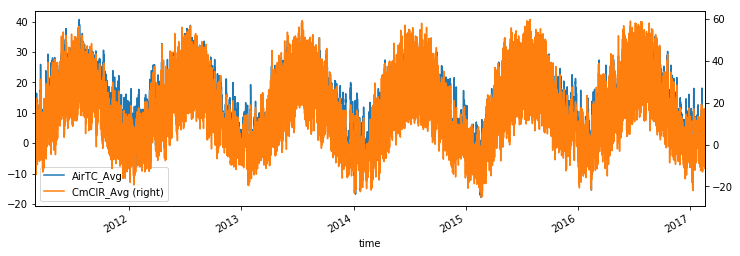

In [12]:
# Plot on left and right axes
newdf_short.plot(secondary_y='CmCIR_Avg', figsize=(12,4));

#### Show monthly boxplots for the entire time series

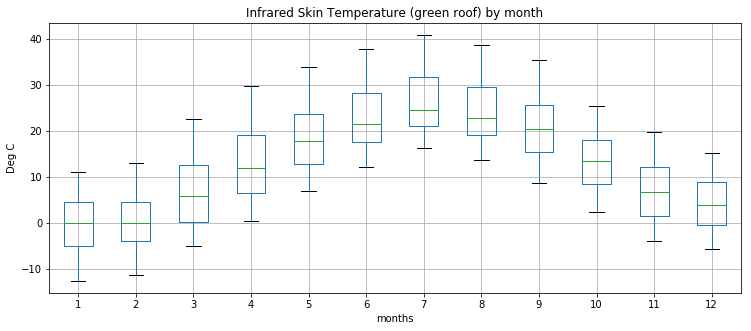

In [13]:
var = 'CmGIR_Avg'
newdf.boxplot(column=var, by=newdf.index.month, whis=[5, 95], sym='', figsize=(12,5))
plt.xlabel('months')
plt.ylabel(ds[var].units)
plt.title(names[var]+' by month')
plt.suptitle('');

#### Plot the diurnal cycle for the entire time series

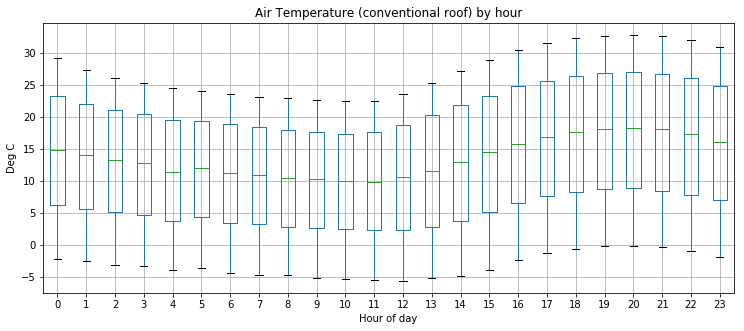

In [14]:
var = 'AirTC_Avg'
newdf.boxplot(column=var, by=newdf.index.hour, whis=[5, 95], sym='', figsize=(12,5))
plt.xlabel('Hour of day')
plt.ylabel(ds[var].units)
plt.title(names[var]+' by hour')
plt.suptitle('');

#### Plot the diurnal cycle for warm seasons

In [15]:
newdf_warm = newdf[(newdf.index.month >= 6) & (newdf.index.month <=8)]

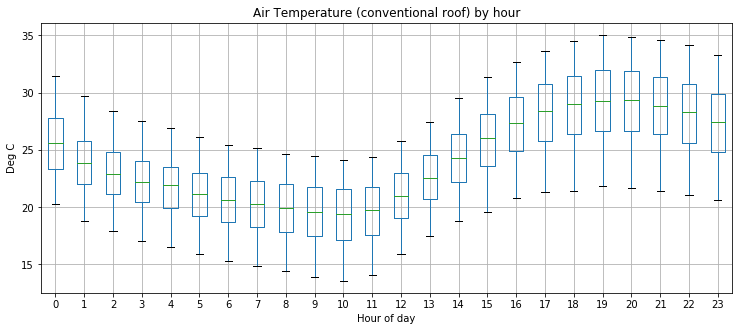

In [16]:
var = 'AirTC_Avg'
newdf_warm.boxplot(column=var, by=newdf_warm.index.hour, whis=[5, 95], sym='', figsize=(12,5))
plt.xlabel('Hour of day')
plt.ylabel(ds[var].units)
plt.title(names[var]+' by hour')
plt.suptitle('');